#Flight Price Prediction Project

Problem statement:

You have been given a dataset of flights details. Based on this data, create a predictive model to predict the prices of flight tickets

In [20]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns,warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('Flight_Booking.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
df.shape

(300153, 12)

##Exploratory data analysis


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Removing the unnecesary columns

In [11]:
df.drop(['Unnamed: 0','flight'],axis=1,inplace=True)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Data cleansing by checking for null values

In [12]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Checking for duplicate rows

In [13]:
df.duplicated().sum()

2213

Very negligible number of duplicates(2213) among total records(300153). They can be dropped directly

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
df.shape

(297940, 10)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297940 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297940 non-null  object 
 1   source_city       297940 non-null  object 
 2   departure_time    297940 non-null  object 
 3   stops             297940 non-null  object 
 4   arrival_time      297940 non-null  object 
 5   destination_city  297940 non-null  object 
 6   class             297940 non-null  object 
 7   duration          297940 non-null  float64
 8   days_left         297940 non-null  int64  
 9   price             297940 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 25.0+ MB


No need to consider outliers as number of numerical columns is less

##Visualization

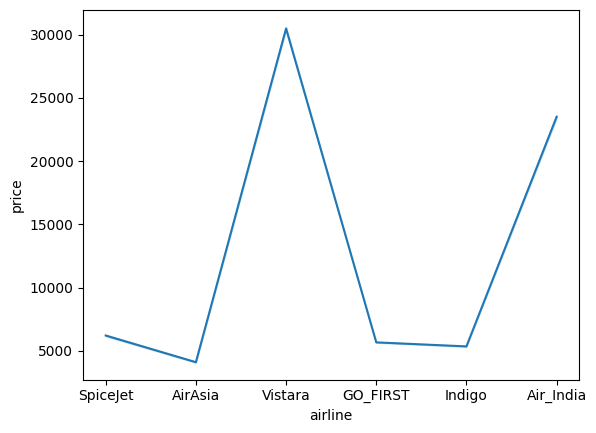

In [21]:
sns.lineplot(data=df,x='airline',y='price')
plt.show()

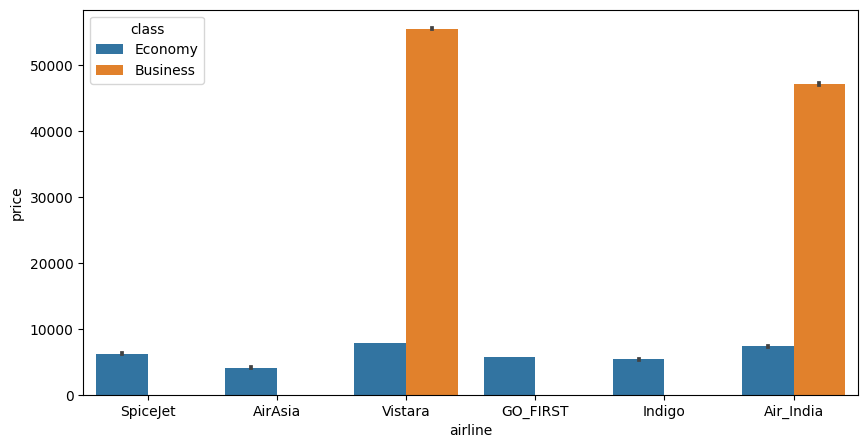

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='airline',y='price',hue='class')
plt.show()

From above graph it is clear that prices of flight tickers by Vistara airlines are higher than others

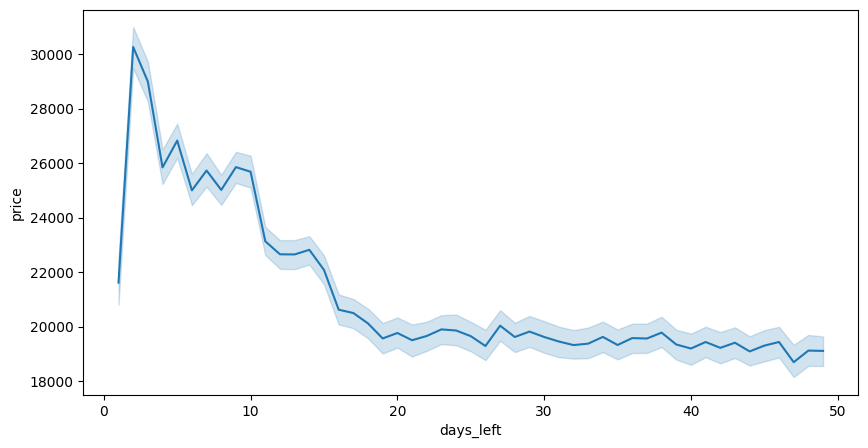

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='days_left',y='price')
plt.show()

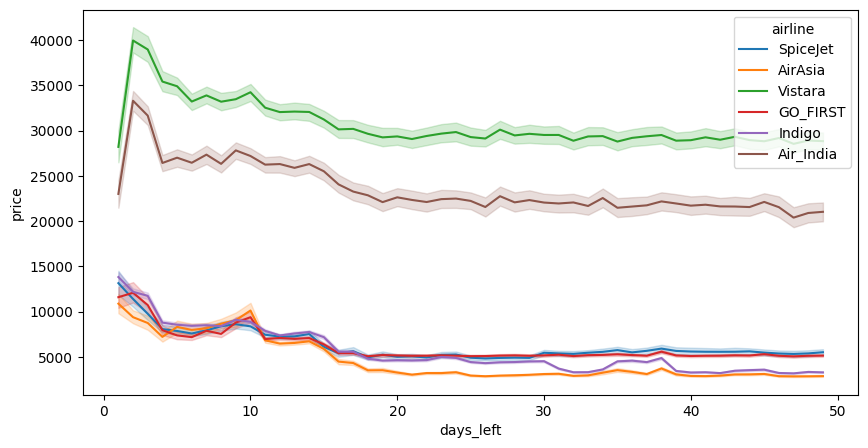

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='days_left',y='price',hue='airline')
plt.show()

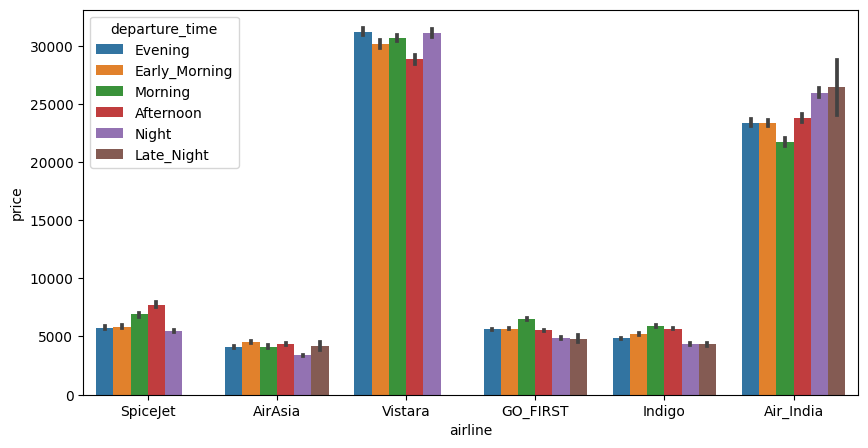

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='airline',y='price',hue='departure_time')
plt.show()

##Data Pre-processing

Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [33]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


Feature selection not really necessary as number of columns is less. VIF can be used here to determine multi-collinearity

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
col_list=[]
for i in df.columns:
    if (df[i].dtype!='object') & (i!='price'):
        col_list.append(i)

col_list

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left']

In [47]:
x=df[col_list]
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


In [50]:
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,VIF values
0,airline,3.382988
1,source_city,2.931342
2,departure_time,2.780203
3,stops,1.407431
4,arrival_time,3.671788
5,destination_city,2.887277
6,class,2.837534
7,duration,4.121452
8,days_left,3.977163


Drop any columns having high VIF > 5

##Feature scaling

Standardization

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [52]:
x=sc.fit_transform(x)
x

array([[ 0.49026614, -0.33080864, -0.23847732, ...,  0.67455141,
        -1.40914395, -1.84438245],
       [ 0.49026614, -0.33080864, -0.80833796, ...,  0.67455141,
        -1.38684971, -1.84438245],
       [-1.68861324, -0.33080864, -0.80833796, ...,  0.67455141,
        -1.40914395, -1.84438245],
       ...,
       [ 1.03498599, -0.90177367, -0.80833796, ..., -1.48246669,
         0.2155487 ,  1.69618017],
       [ 1.03498599, -0.90177367, -0.80833796, ..., -1.48246669,
        -0.31811964,  1.69618017],
       [ 1.03498599, -0.90177367,  0.90124395, ..., -1.48246669,
        -0.30697252,  1.69618017]])

In [53]:
x=pd.DataFrame(x,columns=col_list)
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.490266,-0.330809,-0.238477,2.630586,1.107552,1.381764,0.674551,-1.409144,-1.844382
1,0.490266,-0.330809,-0.808338,2.630586,0.533784,1.381764,0.674551,-1.386850,-1.844382
2,-1.688613,-0.330809,-0.808338,2.630586,-1.187518,1.381764,0.674551,-1.409144,-1.844382
3,1.034986,-0.330809,0.901244,2.630586,-1.761286,1.381764,0.674551,-1.397997,-1.844382
4,1.034986,-0.330809,0.901244,2.630586,0.533784,1.381764,0.674551,-1.386850,-1.844382
...,...,...,...,...,...,...,...,...,...
297935,1.034986,-0.901774,0.901244,-0.419568,-0.613751,0.235269,-1.482467,-0.306973,1.696180
297936,1.034986,-0.901774,-1.378199,-0.419568,1.107552,0.235269,-1.482467,-0.259597,1.696180
297937,1.034986,-0.901774,-0.808338,-0.419568,1.107552,0.235269,-1.482467,0.215549,1.696180
297938,1.034986,-0.901774,-0.808338,-0.419568,-0.613751,0.235269,-1.482467,-0.318120,1.696180


x now contains independent data

y shoould contain target column i.e. dependent column

In [54]:
y=df['price']
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 297940, dtype: int64

Split data into training and test set

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=67)

In [59]:
x_train.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
92382,1.034986,-1.472739,0.901244,-0.419568,1.107552,-0.337978,0.674551,0.019081,1.622418
50606,-1.143893,1.382086,-0.808338,2.630586,0.533784,-0.337978,0.674551,-1.397997,1.253610
121817,1.034986,0.811121,1.471105,-0.419568,-0.613751,-0.337978,0.674551,1.284279,-0.074101
191120,1.034986,-0.901774,-0.238477,-0.419568,1.107552,1.381764,0.674551,-0.921457,1.179848
232801,1.034986,1.382086,0.901244,-0.419568,1.107552,0.808517,-1.482467,0.239236,-1.106765


In [60]:
x_test.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
39468,0.490266,-0.330809,-0.238477,-0.419568,1.107552,-0.911226,0.674551,1.852782,0.442231
161577,-1.143893,0.240156,1.471105,-0.419568,0.533784,1.381764,0.674551,-0.063129,0.589754
5013,-0.599174,-0.330809,-0.238477,-0.419568,-0.039983,1.381764,0.674551,-0.411477,0.073422
251594,1.034986,-1.472739,-0.238477,-0.419568,-0.613751,0.808517,-1.482467,1.412471,-0.664195
87242,-0.599174,-1.472739,-0.238477,-0.419568,1.107552,-0.337978,0.674551,-1.060796,-0.221625


In [61]:
y_train.head()

93691      4111
51419      2464
123346     6461
192915     4137
234882    64285
Name: price, dtype: int64

In [62]:
y_test.head()

40150      4942
163226     3844
5165       3330
253800    51817
88465      7474
Name: price, dtype: int64

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

###Linear Regression

In [66]:
lr_model=LinearRegression()

In [67]:
lr_model

LinearRegression()

Training the model

In [68]:
lr_model.fit(x_train,y_train)

LinearRegression()

Testing the model

In [71]:
lr_pred=lr_model.predict(x_test)
lr_pred

array([ 9336.58519603,  5376.59438335,  6652.99626942, ...,
        4878.962542  , 56507.87824399, 53855.07494458])

Evaluating model by checking accuracy

In [72]:
from sklearn.metrics import *

In [76]:
lr_score=r2_score(y_test,lr_pred)
lr_score

0.9037872739644176

Accuracy is 90%

In [74]:
lr_rmse=np.sqrt(mean_squared_error(y_test,lr_pred))
lr_rmse

7070.203976896867

r2 should be more and RMSE should be less

###Decision Tree Regressor
Applying Decision Tree Regressor to check if we get better accuracy


In [77]:
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [78]:
dt_pred=dt_model.predict(x_test)

In [79]:
dt_pred

array([ 4942.,  3844.,  3330., ...,  4165., 58125., 36565.])

In [80]:
dt_score=r2_score(y_test,dt_pred)
dt_score

0.9756602649408929

In [82]:
dt_rmse=np.sqrt(mean_squared_error(y_test,dt_pred))
dt_rmse

3556.097066042175

###Random Forest Regressor
Applying **Random Forest Regressor** to check if we get better accuracy

In [83]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [84]:
rf_pred=rf_model.predict(x_test)

In [85]:
rf_score=r2_score(y_test,rf_pred)
rf_score

0.9846161411556871

In [86]:
rf_rmse=np.sqrt(mean_squared_error(y_test,rf_pred))
rf_rmse

2827.146584057209

In [88]:
print('Linear regression: r2_score=',lr_score,'and RMSE=',lr_rmse)
print('DT regression: r2_score=',dt_score,'and RMSE=',dt_rmse)
print('RF regression: r2_score=',rf_score,'and RMSE=',rf_rmse)

Linear regression: r2_score= 0.9037872739644176 and RMSE= 7070.203976896867
DT regression: r2_score= 0.9756602649408929 and RMSE= 3556.097066042175
RF regression: r2_score= 0.9846161411556871 and RMSE= 2827.146584057209


Random Forest is best classifier model for this dataset